In [18]:
# import libraties

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# load csv file to a dataframe

df = pd.read_csv('Data/SET50_download_r2/ADVANC.BK.csv', index_col = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,44.599998,46.000000,43.000000,43.400002,11.032709,1039000
2000-01-05,38.200001,41.000000,38.000000,40.599998,10.320922,2624000
2000-01-06,41.000000,41.200001,38.400002,38.599998,9.812499,1341000
2000-01-07,38.599998,39.799999,38.000000,38.599998,9.812499,1164000
2000-01-10,39.799999,40.799999,39.599998,40.000000,10.168396,761000


In [4]:
df.index

Index(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-10',
       '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14', '2000-01-17',
       ...
       '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
       '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23'],
      dtype='object', name='Date', length=5994)

In [5]:
# set index from object to datetime

df.set_index(pd.to_datetime(df.index), inplace = True)
df.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
               '2024-02-16', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23'],
              dtype='datetime64[ns]', name='Date', length=5994, freq=None)

In [6]:
# get data from 2020

df = df['2020':]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-19,209.0,210.0,208.0,209.0,209.0,4822100
2024-02-20,210.0,210.0,207.0,207.0,207.0,4352500
2024-02-21,208.0,209.0,203.0,205.0,205.0,12475500
2024-02-22,205.0,211.0,204.0,209.0,209.0,9222400
2024-02-23,209.0,209.0,206.0,206.0,206.0,4196600


In [8]:
df.shape

(1006, 6)

### Simple Return

$$
\frac{P_t}{P_{t-1}} - 1
$$

In [9]:
# add new calculated column for simple return

df['simple_return'] = (df['Close']/df['Close'].shift(1)) - 1
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300,NaN
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800,-0.009174
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100,0.004630
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900,0.027650
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300,-0.013453


In [10]:
216.0/218.0 - 1

-0.00917431192660545

In [11]:
# apply a build-in function to get simple return

df['Close'].pct_change().head() 

Date
2020-01-02         NaN
2020-01-03   -0.009174
2020-01-06    0.004630
2020-01-07    0.027650
2020-01-08   -0.013453
Name: Close, dtype: float64

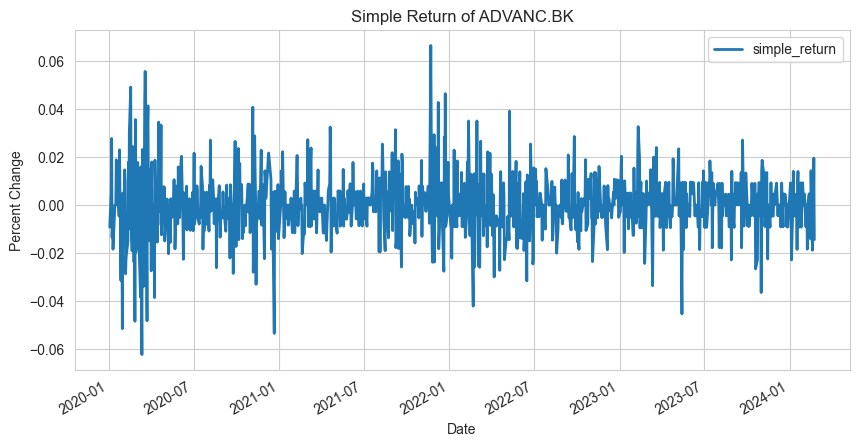

In [21]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['simple_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Simple Return of ADVANC.BK')
plt.show()

In [14]:
df['simple_return'].mean()

2.78089765051957e-05

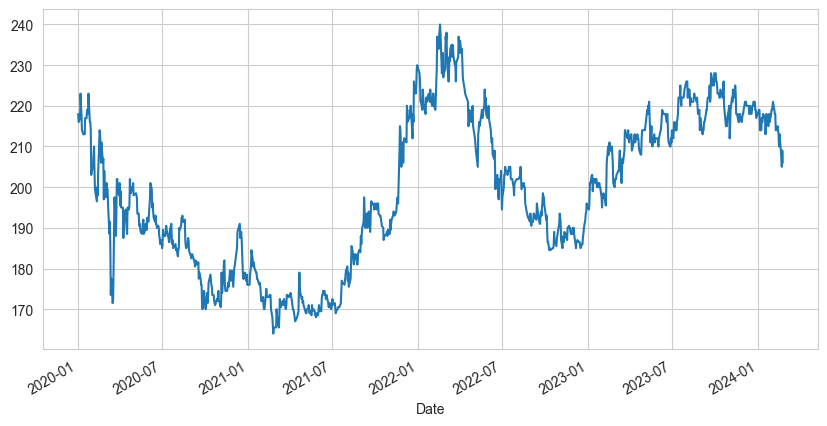

In [15]:
df['Close'].plot(); # plot

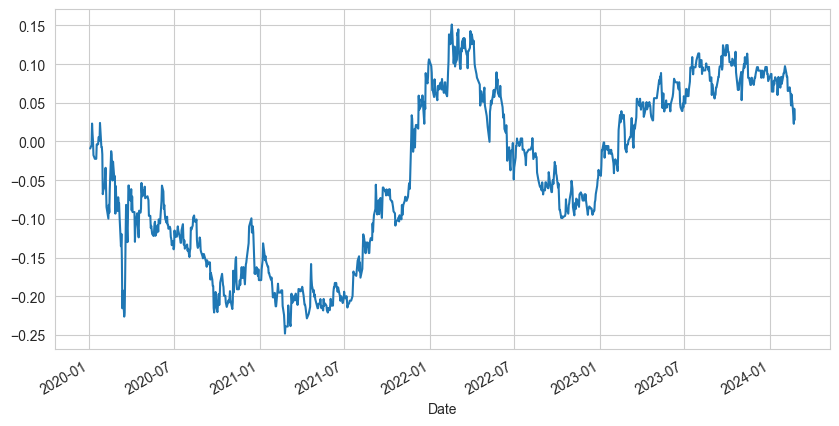

In [17]:
df['simple_return'].cumsum().plot(); # plot cumsum

### Log Return

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [19]:
# add a new calculated column for log return


df['log_return'] = np.log(df['Close']/df['Close'].shift(1))
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2020-01-02,214.0,219.0,212.0,218.0,183.957199,5921300,NaN,NaN
2020-01-03,216.0,217.0,215.0,216.0,182.269547,4426800,-0.009174,-0.009217
2020-01-06,216.0,220.0,216.0,217.0,183.113388,5147100,0.004630,0.004619
2020-01-07,218.0,224.0,217.0,223.0,188.176453,7220900,0.027650,0.027274
2020-01-08,221.0,223.0,219.0,220.0,185.644913,6768300,-0.013453,-0.013544


In [20]:
np.log(216.0/218.0)

-0.009216655104923952

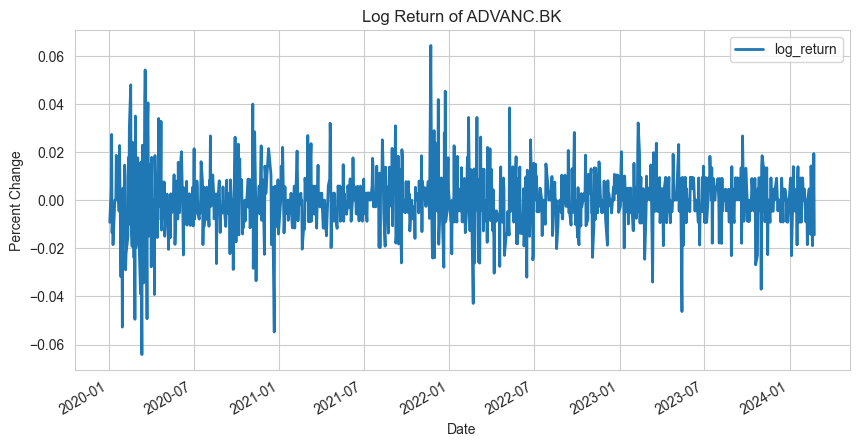

In [22]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['log_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Log Return of ADVANC.BK')
plt.show()

In [24]:
df['log_return'].mean()

-5.6337207959711395e-05

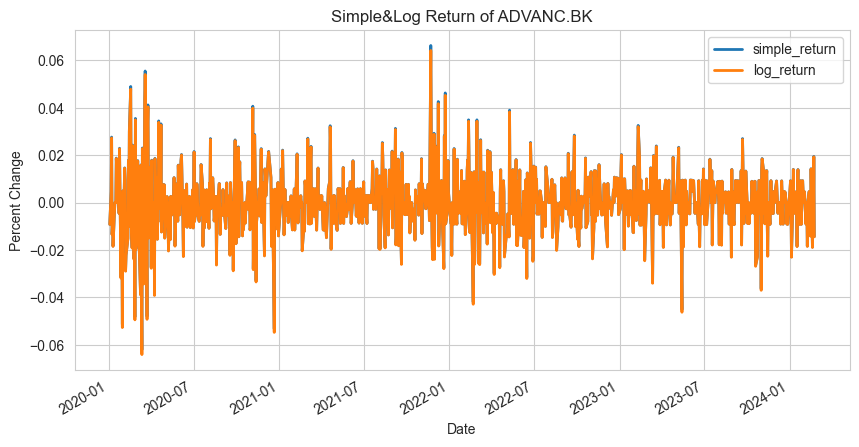

In [23]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

df[['simple_return', 'log_return']].plot(linewidth = 2)
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Simple&Log Return of ADVANC.BK')
plt.show()

In [25]:
# Annual Log Return

annual_log_return = df['log_return'].mean() * 252
annual_log_return

-0.01419697640584727

In [26]:
print(f'Annual Return: {(annual_log_return * 100):.4}%')

Annual Return: -1.42%


### Randoms, Histogram, and Normal Distribution

In [27]:
np.random.seed(20)

mu = 0
sigma = 0.05

In [28]:
stock_1 = np.random.normal(mu, sigma, 10000) # random numbers
stock_1

array([ 0.04419466,  0.00979325,  0.01787683, ..., -0.04157543,
       -0.06966699, -0.05317517])

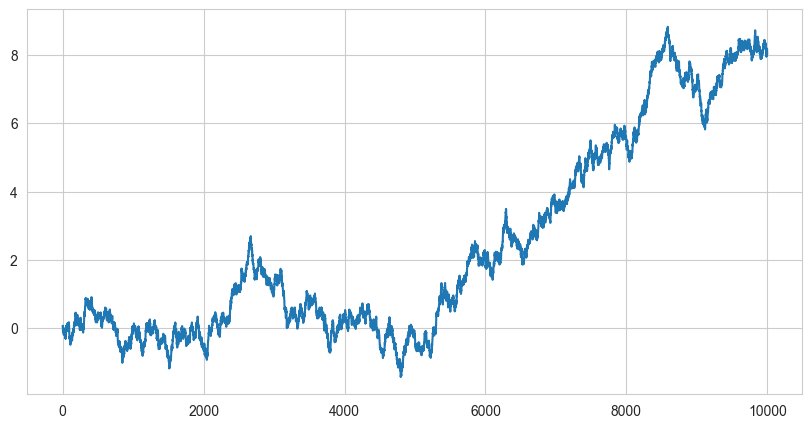

In [29]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.plot(stock_1.cumsum())

<AxesSubplot: ylabel='Count'>

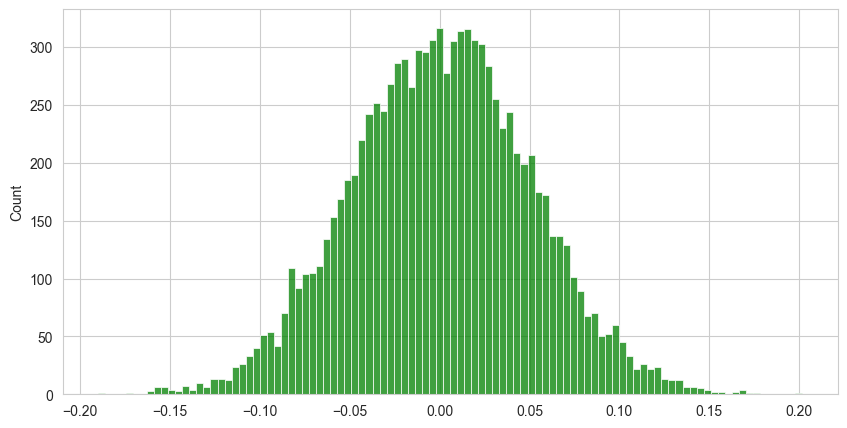

In [30]:
sns.histplot(stock_1, bins = 100, color = 'green')

In [31]:
# load csv data to a dataframe

bdms = pd.read_csv('Data/SET50_download_r2/BDMS.BK.csv', index_col = 0)
bdms.set_index(pd.to_datetime(bdms.index), inplace = True)
bdms = bdms['2013': '2023']
bdms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,11.50,11.50,11.30,11.30,9.314999,19474000
2013-01-03,11.35,11.45,11.35,11.45,9.438648,25001000
2013-01-04,11.45,11.50,11.35,11.50,9.479865,22793000
2013-01-07,11.55,11.60,11.40,11.40,9.397430,27909000
2013-01-08,11.40,11.55,11.40,11.50,9.479865,15006000


In [32]:
bdms.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,26.25,26.75,26.00,26.25,26.25,65617700
2023-12-25,26.25,26.75,26.25,26.75,26.75,15755500
2023-12-26,26.75,27.75,26.75,27.50,27.50,65852500
2023-12-27,27.50,27.75,27.25,27.75,27.75,39174500
2023-12-28,27.50,28.00,27.25,27.75,27.75,44815400


<AxesSubplot: xlabel='Close', ylabel='Count'>

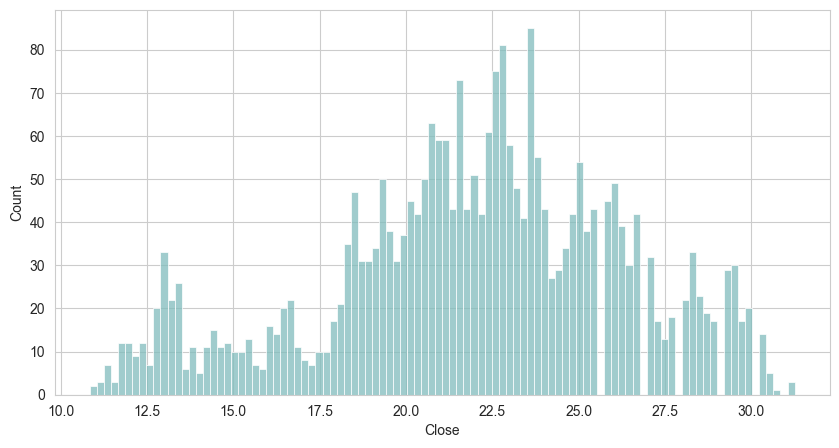

In [34]:
sns.histplot(bdms['Close'], bins = 100, color = '#80BCBD')

In [35]:
bdms_pct = bdms['Close'].pct_change()
bdms_pct

Date
2013-01-02         NaN
2013-01-03    0.013274
2013-01-04    0.004367
2013-01-07   -0.008696
2013-01-08    0.008772
                ...   
2023-12-22    0.009615
2023-12-25    0.019048
2023-12-26    0.028037
2023-12-27    0.009091
2023-12-28    0.000000
Name: Close, Length: 2677, dtype: float64

In [36]:
bdms_pct = bdms_pct.dropna()
bdms_pct

Date
2013-01-03    0.013274
2013-01-04    0.004367
2013-01-07   -0.008696
2013-01-08    0.008772
2013-01-09   -0.004348
                ...   
2023-12-22    0.009615
2023-12-25    0.019048
2023-12-26    0.028037
2023-12-27    0.009091
2023-12-28    0.000000
Name: Close, Length: 2676, dtype: float64

In [37]:
# setting

mu_bdms = bdms_pct.mean()
sigma_bdms = bdms_pct.std()

stock_bdms = np.random.normal(mu_bdms, sigma_bdms, bdms_pct.shape[0])
stock_bdms

array([-0.0040874 , -0.00073886,  0.00311005, ..., -0.00084093,
        0.00351513, -0.02520514])

In [38]:
stock_bdms.shape

(2676,)

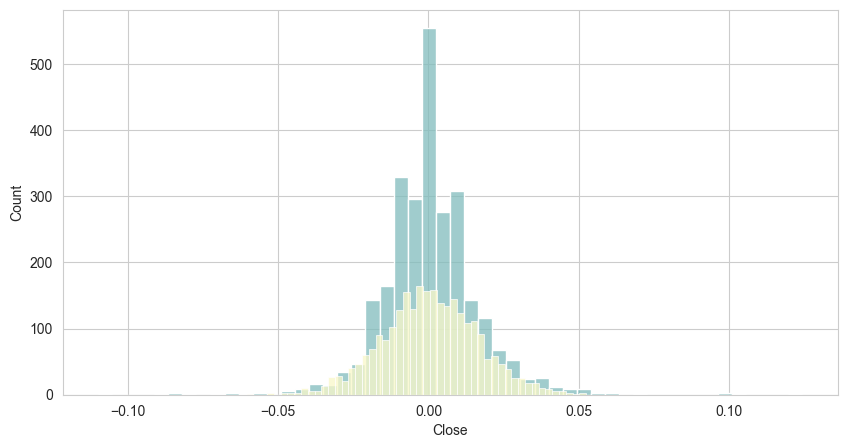

In [41]:
# plots

sns.histplot(bdms_pct, color = '#80BCBD', bins = 50) # pastel grren 
sns.histplot(stock_bdms, bins = 50, color = '#F9F7C9') # pastel yellow
plt.show()

### Mean

In [42]:
numbers = (1, 3, 5, 7, 9, 2, 4)
numbers

(1, 3, 5, 7, 9, 2, 4)

In [43]:
n = len(numbers)
n

7

In [44]:
mean = np.sum(numbers)/n
mean

4.428571428571429

In [45]:
# apply numpy function

np.mean(numbers)

4.428571428571429

In [46]:
# calculate mean of bdms_pct

bdms_pct.mean()

0.0004614288408716415

Stock BDMS mean: 0.000439%


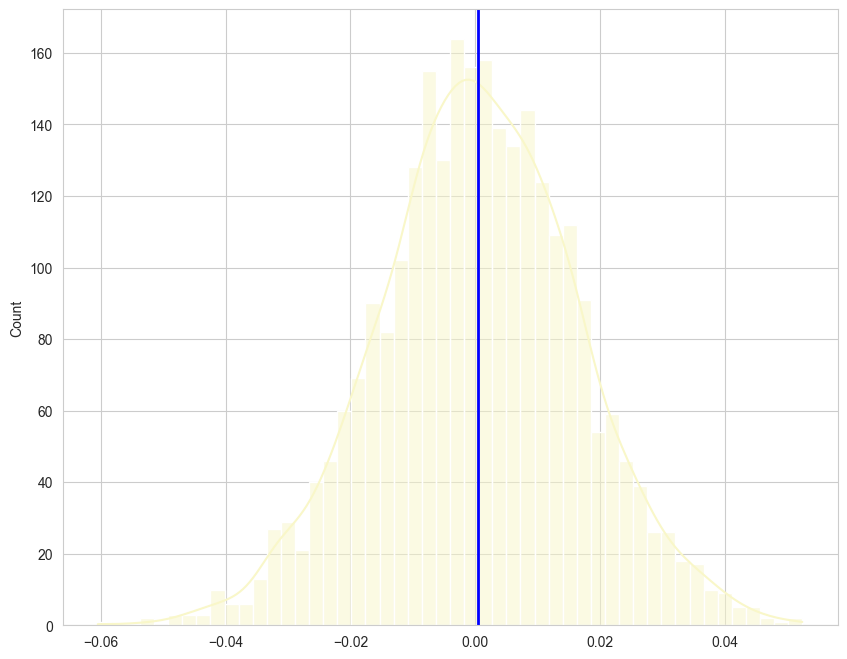

In [52]:
# plot mean

plt.rcParams['figure.figsize'] = (10.0, 8.0)

sns.histplot(stock_bdms, color = '#F9F7C9', bins = 50, kde = True)

plt.axvline(np.mean(stock_bdms), color = 'Blue', linewidth = 2)
print(f'Stock BDMS mean: {np.mean(stock_bdms):.4}%')

### Median

In [55]:
numbers = (1, 3, 5, 7, 9, 2, 4) # sorted 1, 2, 3, 4, 5, 7, 9
np.median(numbers)

4.0

Mean: 0.00044%
Median: 0.00039%


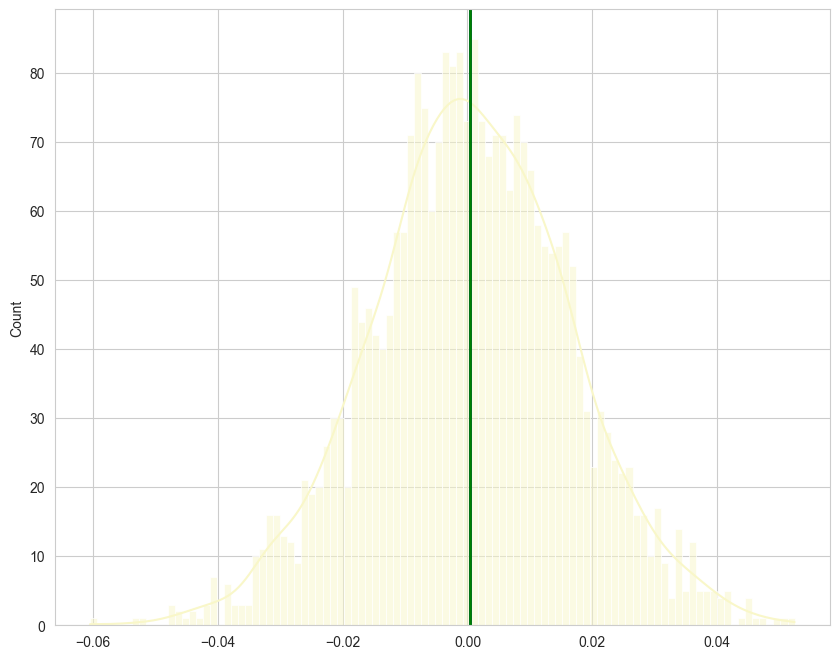

In [54]:
sns.histplot(stock_bdms, color='#F9F7C9', bins = 100, kde = True)
plt.axvline(np.mean(stock_bdms), color = 'Blue', linewidth = 2)
plt.axvline(np.median(stock_bdms), color = 'Green', linewidth = 2)
print(f'Mean: { np.round(np.mean(stock_bdms), 5)}%')
print(f'Median: { np.round(np.median(stock_bdms), 5)}%')

### Skew

- Mean > Median --> Skew to the right
- Mean < Median --> Skew to the left

In [56]:
from scipy.stats import skewnorm

In [58]:
stock_a = skewnorm.rvs(10, size = 1000)
stock_a

array([ 6.11442412e-01,  9.26301224e-01,  5.62979525e-01,  1.15587410e+00,
        6.64491787e-02,  1.68845226e+00,  7.40738967e-01,  9.95798315e-01,
        4.40797309e-01,  1.55586747e+00,  2.17348639e+00,  6.65551456e-02,
        1.53236861e+00,  6.21434166e-01,  6.20805579e-01,  3.17324240e-01,
        1.37846643e-01,  7.15742050e-01,  2.42275623e+00,  1.05158868e+00,
        6.95970652e-01,  1.44728933e+00,  2.82327881e-01,  2.52499450e+00,
        5.73530984e-01,  1.14816098e+00,  5.55718274e-01,  1.51404466e+00,
        2.41671506e-01,  6.86383839e-02,  8.81882278e-01,  1.36395059e+00,
        1.20142928e+00,  1.14591409e-01,  1.13275553e+00,  1.83328625e-01,
        1.10166251e+00,  1.05812360e+00,  7.41394945e-01,  4.93501381e-01,
        5.09570845e-01,  7.00282919e-01,  1.51697944e-02,  1.18425439e+00,
        1.85693332e-01,  7.36321859e-01,  1.33542868e+00,  6.94715121e-02,
        9.21242196e-01,  5.00206946e-01,  7.64051513e-01,  9.14015182e-02,
        5.52885794e-02,  

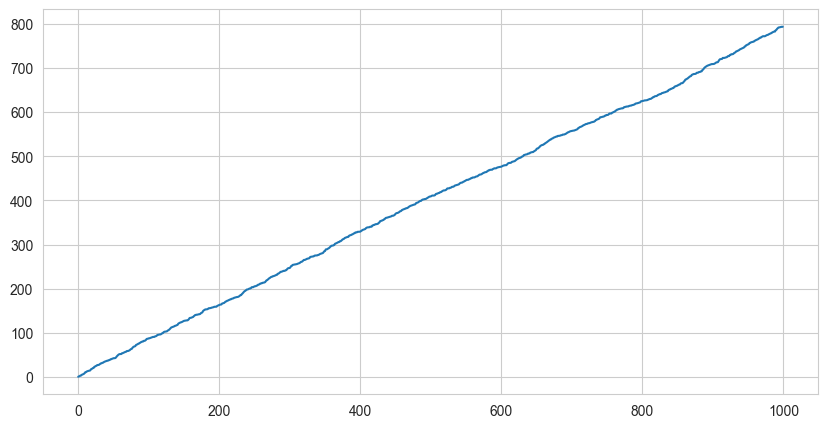

In [60]:
# plot

plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.plot(np.cumsum(stock_a))
plt.show()

<AxesSubplot: ylabel='Count'>

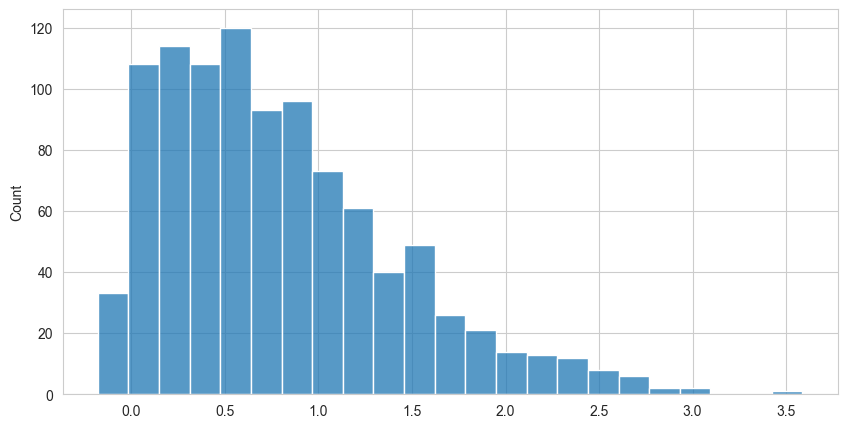

In [62]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

sns.histplot(stock_a)

Mean: 0.79341%
Median: 0.66817%


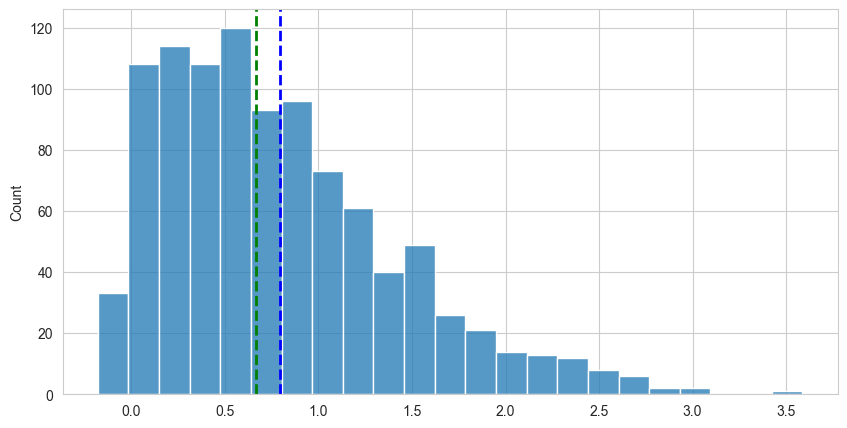

In [68]:
# Mean > Median --> Skew to the right

plt.rcParams['figure.figsize'] = (10.0, 5.0)

sns.histplot(stock_a)

plt.axvline(np.mean(stock_a), color = 'Blue', linewidth = 2, linestyle = '--')
plt.axvline(np.median(stock_a), color = 'Green', linewidth = 2, linestyle = '--')

print(f'Mean: {np.round(np.mean(stock_a), 5)}%')
print(f'Median: {np.round(np.median(stock_a), 5)}%')

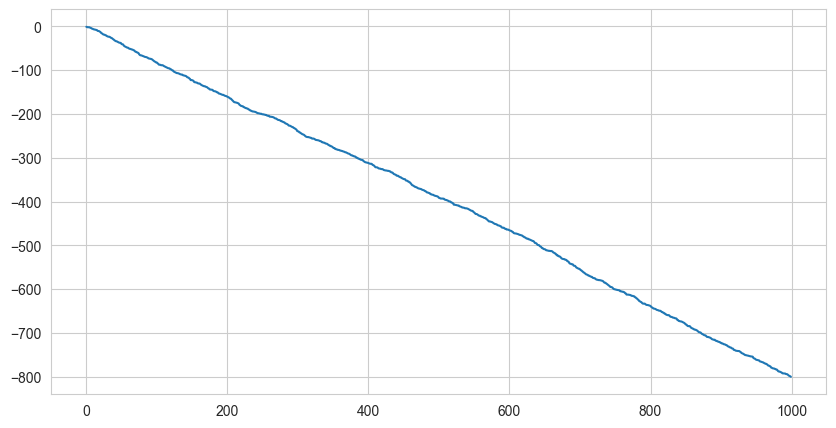

In [69]:
# Mean < Median --> Skew to the left

stock_b = skewnorm.rvs(-10, size = 1000)
plt.plot(np.cumsum(stock_b));

Mean: -0.79989%
Median: -0.65607%


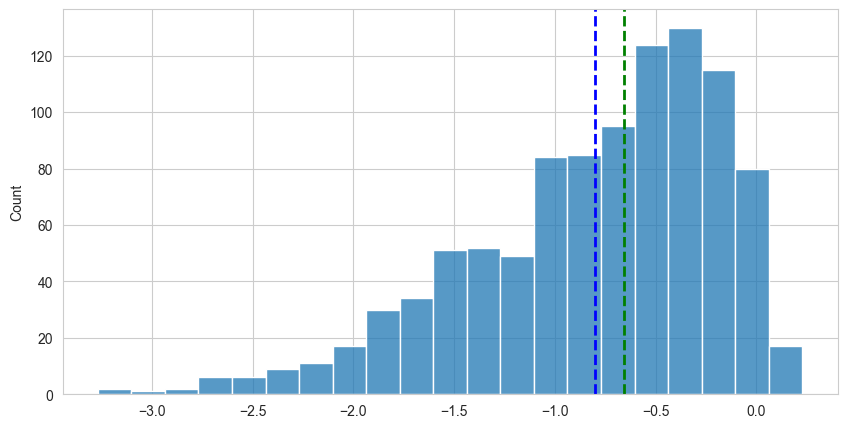

In [70]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

sns.histplot(stock_b)

plt.axvline(np.mean(stock_b), color = 'Blue', linewidth = 2, linestyle = '--')
plt.axvline(np.median(stock_b), color = 'Green', linewidth = 2, linestyle = '--')

print(f'Mean: {np.round(np.mean(stock_b), 5)}%')
print(f'Median: {np.round(np.median(stock_b), 5)}%')

Mean: -0.78188%
Median: -0.69513%


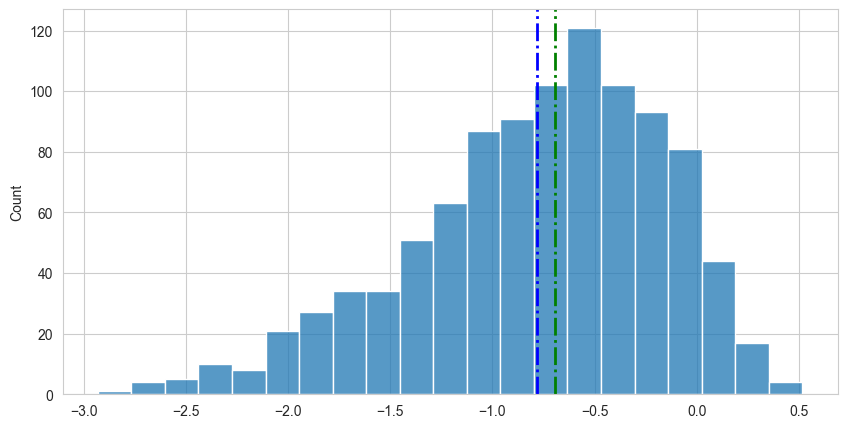

In [71]:
stock_c = skewnorm.rvs(-5, size = 1000)

sns.histplot(stock_c)

plt.axvline(np.mean(stock_c), color = 'Blue', linewidth = 2, linestyle = '-.') # dash-dot line style
plt.axvline(np.median(stock_c), color = 'Green', linewidth = 2, linestyle = '-.')

print(f'Mean: {np.round(np.mean(stock_c), 5)}%')
print(f'Median: {np.round(np.median(stock_c), 5)}%')

Mean: -0.66288%
Median: -0.6125%


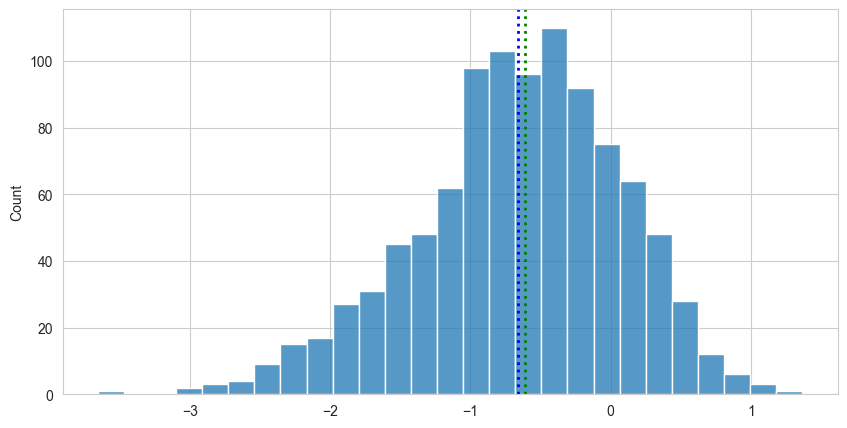

In [73]:
stock_d = skewnorm.rvs(-2, size = 1000)

sns.histplot(stock_d)

plt.axvline(np.mean(stock_d), color = 'Blue', linewidth = 2, linestyle = ':') # dotted line style
plt.axvline(np.median(stock_d), color = 'Green', linewidth = 2, linestyle = ':')

print(f'Mean: {np.round(np.mean(stock_d), 5)}%')
print(f'Median: {np.round(np.median(stock_d), 5)}%')

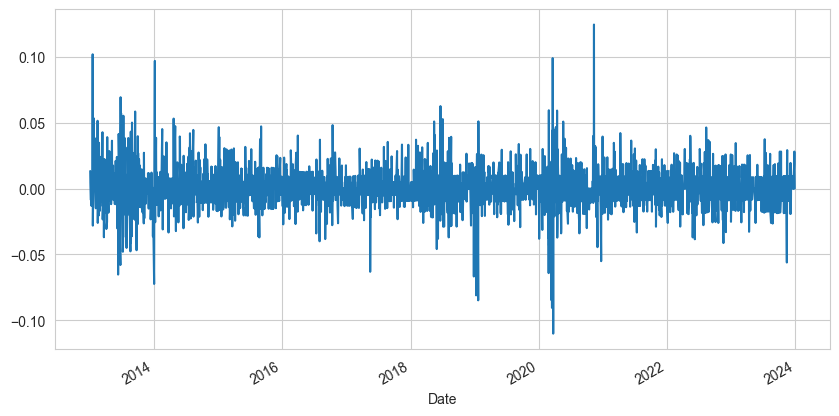

In [74]:
bdms_pct.plot();

Mean: 0.00046%
Median: 0.0%


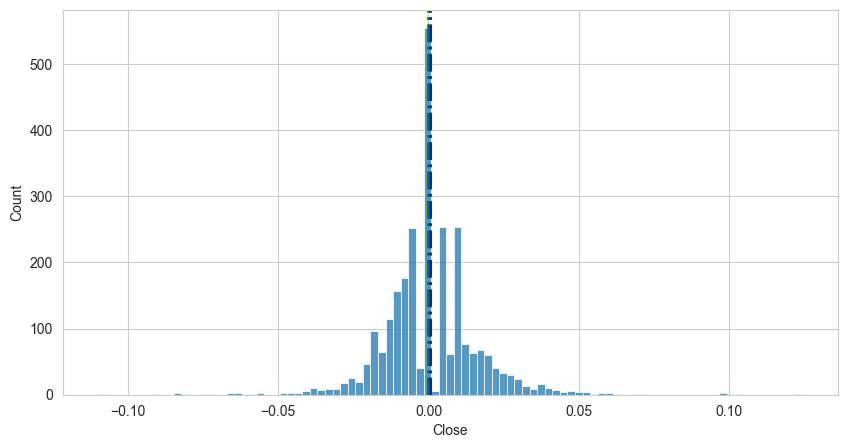

In [75]:
# plot bdms_pct

sns.histplot(bdms_pct)

plt.axvline(np.mean(bdms_pct), color = 'Blue', linewidth = 2, linestyle = '-.') # dash-dot line style
plt.axvline(np.median(bdms_pct), color = 'Green', linewidth = 2, linestyle = '-.')

print(f'Mean: {np.round(np.mean(bdms_pct), 5)}%')
print(f'Median: {np.round(np.median(bdms_pct), 5)}%')

### Quantile and Percentile

In [76]:
bdms_pct.quantile(0.25) * 100

-0.8771929824561431

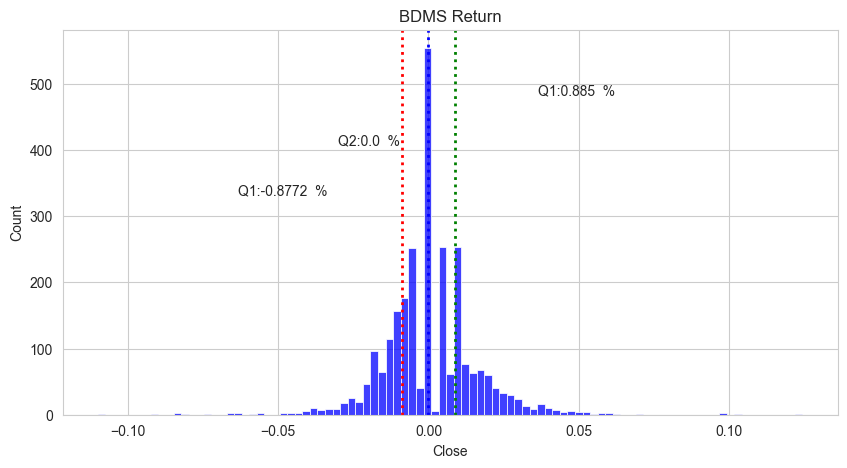

In [81]:
sns.histplot(bdms_pct, color = 'blue')
plt.title("BDMS Return")

q1 = bdms_pct.quantile(0.25)
q2 = bdms_pct.quantile(0.5)
q3 = bdms_pct.quantile(0.75)

plt.axvline(x = q1, linewidth = 2, color = 'Red', linestyle = ':')
plt.figtext(0.3, 0.55, f"Q1:{q1 * 100:.4}  %", fontsize = 10)

plt.axvline(x = q2, linewidth = 2, color = 'Blue', linestyle = ':')
plt.figtext(0.4, 0.65, f"Q2:{q2 * 100:.4}  %", fontsize = 10)

plt.axvline(x = q3, linewidth = 2, color = 'Green', linestyle = ':')
plt.figtext(0.6, 0.75, f"Q1:{q3 * 100:.4}  %", fontsize = 10)
plt.show()

### Percentile

In [ ]:
np.percentile(bdms_pct, 1) * 100 # at percentile #1

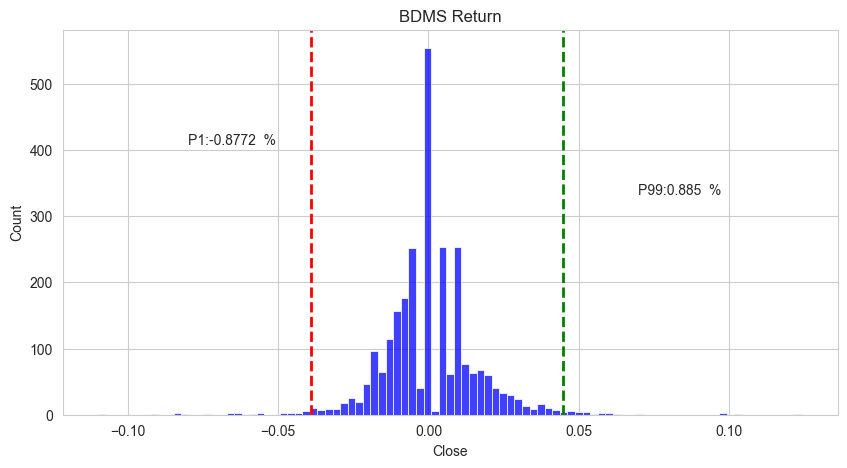

In [83]:
sns.histplot(bdms_pct, color = 'blue')
plt.title("BDMS Return")

p1 = np.percentile(bdms_pct, 1) # P1
p99 = np.percentile(bdms_pct, 99) # P99

plt.axvline(x = p1, linewidth = 2, color = 'Red', linestyle = '--')
plt.figtext(0.25, 0.65, f"P1:{q1 * 100:.4}  %", fontsize = 10)

plt.axvline(x = p99, linewidth = 2, color = 'Green', linestyle = '--')
plt.figtext(0.70, 0.55, f"P99:{q3 * 100:.4}  %", fontsize = 10)
plt.show()

### Variance and Standard Deviation

In [125]:
# 2 sets of 5 numbers that have the same mean but different standard deviations

set1 = (21, 19, 22, 18, 20) # 21%, 19%, 22%, 18%, and 20% in 5 years rang
set2 = (55, -15, -25, 55, 30)

print(f'Mean of SET1: {np.mean(set1)}')
print(f'Mean of SET2: {np.mean(set2)}')

Mean of SET1: 20.0
Mean of SET2: 20.0


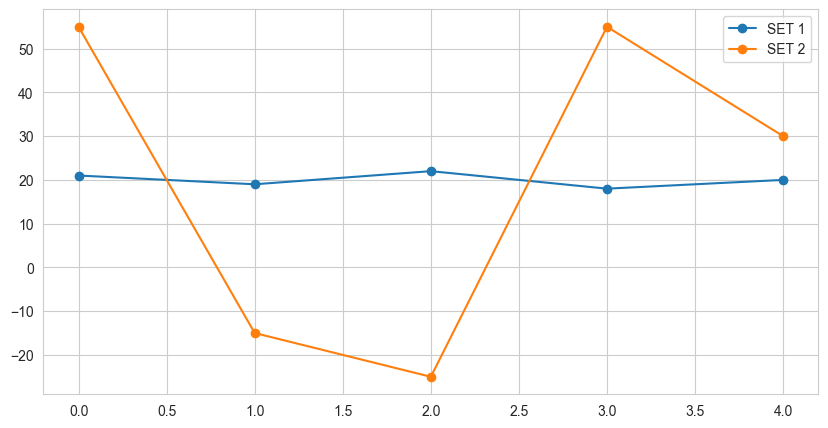

In [127]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.plot(set1, label = "SET 1", marker='o')
plt.plot(set2, label = "SET 2", marker='o')
plt.legend()
plt.show()

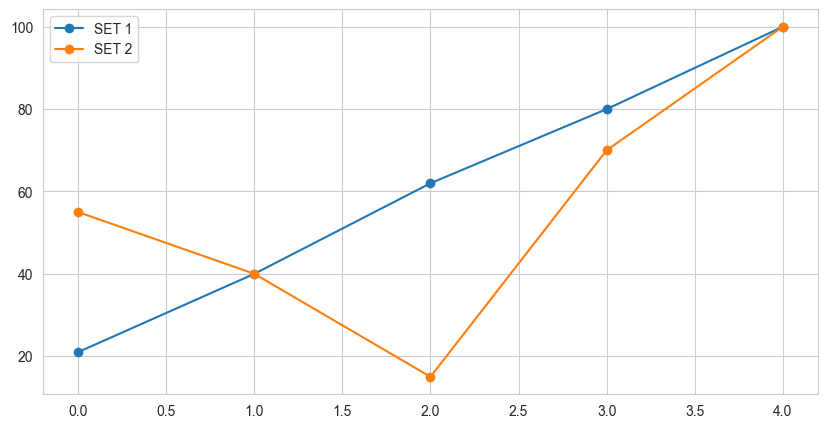

In [128]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)

plt.plot(np.cumsum(set1), label = "SET 1", marker='o')
plt.plot(np.cumsum(set2), label = "SET 2", marker='o')
plt.legend()
plt.show()